In [26]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.layers import *

In [9]:
path = r'/Users/saad/Desktop/Image-Captioning/Train/Data'
caption = 'captions.csv'

In [11]:
df = pd.read_csv(os.path.join(path,caption),delimiter='|')
df.head(10)

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a gian...
6,10002456.jpg,1,Workers look down from up above on a piece of...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


In [24]:
def image_read(path):
    old = os.getcwd()
    images=[]
    names=[]
    for i in os.listdir(path):
#         print(i)
        images.append(cv2.resize(cv2.imread(os.path.join(path,i)),(240,240)))
        names.append(i)
    return np.array(images),names

In [25]:
images,names = image_read(os.path.join(path,'images'))

In [23]:
images.shape

(30, 240, 240, 3)

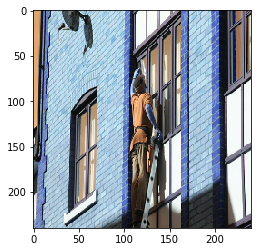

In [29]:
plt.imshow(images[1])

In [28]:
names[1]

'1000344755.jpg'

In [30]:
import math
math.sqrt(2048)

45.254833995939045

In [35]:
from tensorflow.keras.applications import ResNet50
model=ResNet50(include_top=False,weights="imagenet",input_shape=(240,240,3),pooling='avg')

In [36]:
preds = model.predict(images)

In [37]:
preds.shape

(30, 2048)

In [38]:
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [64]:
df_caption = df[df[' comment_number']==0].reset_index(drop=True)
df_caption[' comment'] = df_caption[' comment'].str.rstrip()
df_caption[' comment']=df_caption[' comment'].str.lstrip()
df_caption.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their ...
1,10002456.jpg,0,Several men in hard hats are operating a giant...
2,1000268201.jpg,0,A child in a pink dress is climbing up a set o...
3,1000344755.jpg,0,Someone in a blue shirt and hat is standing on...
4,1000366164.jpg,0,"Two men , one in a gray shirt , one in a black..."


In [79]:
df_names = pd.DataFrame(names,columns=['image_name'])
df_combined = df_names.merge(df_caption,on='image_name',how='left')
df_combined['tokens']=['<START> ']+df_combined[' comment'] + [' <END>']
df_combined.head()

,image_name,comment_number,comment,tokens
0,100577935.jpg,0,A man with a goatee in a black shirt and white...,<START> A man with a goatee in a black shirt a...
1,1000344755.jpg,0,Someone in a blue shirt and hat is standing on...,<START> Someone in a blue shirt and hat is sta...
2,10002456.jpg,0,Several men in hard hats are operating a giant...,<START> Several men in hard hats are operating...
3,10010052.jpg,0,A girl is on rollerskates talking on her cellp...,<START> A girl is on rollerskates talking on h...
4,1003163366.jpg,0,a man sleeping on a bench outside with a white...,<START> a man sleeping on a bench outside with...


In [80]:
captions = df_combined['tokens'].tolist()
len(captions)

30

In [81]:
captions[0]

"<START> A man with a goatee in a black shirt and white latex gloves is using a tattoo gun to place a tattoo on someone 's back . <END>"